In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading CSV file and features present inside it.

In [251]:
df = pd.read_excel('triproute.xls')

In [252]:
df.head()

,Trip_id,fuel_consumption,total_time,average_speed,Crash,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc
0,1,1.633,00:43:37,30.494434,0,22676.0,0,118,184,4,1
1,2,0.284,00:14:10,18.058823,0,4000.0,0,60,77,3,1
2,3,0.088,00:02:33,18.087805,0,824.0,0,45,19,1,2
3,4,1.021,00:17:20,44.190735,0,13515.0,0,108,86,1,0
4,5,0.271,00:10:34,23.780981,0,4307.0,13,65,82,3,3


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip_id             728 non-null    int64  
 1   fuel_consumption    719 non-null    float64
 2   total_time          728 non-null    object 
 3   average_speed       728 non-null    float64
 4   Crash               728 non-null    int64  
 5   distance_travelled  682 non-null    float64
 6   Alarms              728 non-null    int64  
 7   max_speed           728 non-null    int64  
 8   speedoverlimit      728 non-null    int64  
 9   SuddenDcc           728 non-null    int64  
 10  SuddenAcc           728 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 62.7+ KB


In [239]:
df.Crash.unique().sum()

0

## Goals we need to acheive from the dataset

### 1. Define a scoring algorithm based on the driving behaviour.
### 2. Extract Key insights from the Given Dataset.
### 3. Suggest any other metrics which can be devised for measuring driving behaviour.

### Leanring about data through vizualizations and Key Insights


In [240]:
df.describe()

,Trip_id,fuel_consumption,average_speed,Crash,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc
count,728.000000,719.000000,728.000000,728.0,682.000000,728.000000,728.00000,728.000000,728.000000,728.000000
mean,364.500000,1.426636,33.288791,0.0,21624.659824,0.982143,79.95467,90.826923,3.451923,2.708791
std,210.299786,2.673602,21.233701,0.0,39628.476193,3.437948,41.03227,83.443267,4.468800,4.603728
min,1.000000,0.000000,0.498462,0.0,9.000000,0.000000,8.00000,1.000000,0.000000,0.000000
25%,182.750000,0.193500,18.404610,0.0,3000.000000,0.000000,50.00000,34.750000,0.000000,0.000000
50%,364.500000,0.522000,29.872977,0.0,7456.000000,0.000000,74.00000,72.000000,2.000000,1.000000
75%,546.250000,1.260000,43.100763,0.0,19000.000000,0.000000,114.00000,124.250000,5.000000,3.000000
max,728.000000,24.898000,117.499810,0.0,342000.000000,13.000000,178.00000,820.000000,41.000000,39.000000


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SuddenDcc', ylabel='count'>

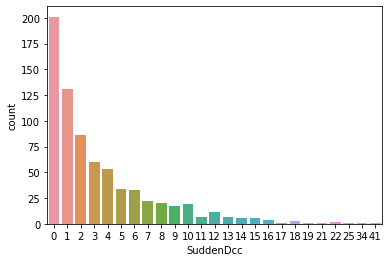

In [241]:
sns.countplot(df.SuddenDcc)

####                          Right skewed distribution

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SuddenAcc', ylabel='count'>

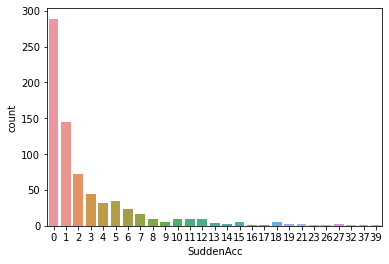

In [242]:
sns.countplot(df.SuddenAcc)

#### Distribution is right skewed for this feature

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alarms', ylabel='count'>

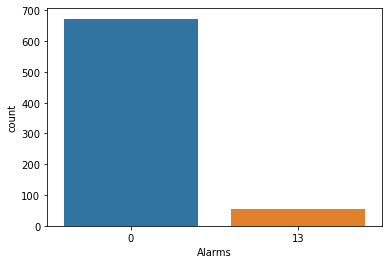

In [243]:
sns.countplot(df.Alarms)

<AxesSubplot:>

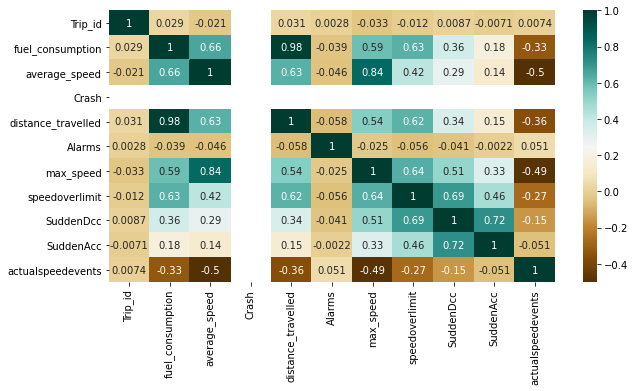

In [319]:
plt.figure(figsize=[10,5])
sns.heatmap(df.corr(),annot=True,cmap='BrBG')

#### * Feature Selection Technique *
#### You can put a thershold and eliminate the columns which are highly correlated

In [244]:
df.Alarms.value_counts()

0     673
13     55
Name: Alarms, dtype: int64

In [245]:
# Now for one feature that we will be working upon is Speedoverlimit->No. of Speed events
# So in here we cannot take directly the values and make clusters over them as for a right seed events value
# We need to take the distance travelled as well
# i.e. right speed event value = Distance travelled by a person / No. of speed events and has the same datatype(int)
# we will derive a new column for it and merge it in df

In [253]:
print(np.mean(df.distance_travelled))
df.distance_travelled.fillna(np.mean(df.distance_travelled),inplace=True)
df['distance_travelled']=df['distance_travelled']/1000.0
print(df['distance_travelled'].head())
df['actualspeedevents'] = round(( df.speedoverlimit/df.distance_travelled),0).astype(int)
df['actualspeedevents'].head()
df.head()

21624.65982404692
0    22.676
1     4.000
2     0.824
3    13.515
4     4.307
Name: distance_travelled, dtype: float64


,Trip_id,fuel_consumption,total_time,average_speed,Crash,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc,actualspeedevents
0,1,1.633,00:43:37,30.494434,0,22.676,0,118,184,4,1,8
1,2,0.284,00:14:10,18.058823,0,4.000,0,60,77,3,1,19
2,3,0.088,00:02:33,18.087805,0,0.824,0,45,19,1,2,23
3,4,1.021,00:17:20,44.190735,0,13.515,0,108,86,1,0,6
4,5,0.271,00:10:34,23.780981,0,4.307,13,65,82,3,3,19


In [254]:
#will take one coulumn at a time(only the ones to be used for clustering) and see the outlier rate
# and use the appropriate clustering algo

In [256]:
# using IQR for outlier detection
# for SuddenDcc
iqr = np.percentile(df.SuddenDcc,75)-np.percentile(df.SuddenDcc,25)
lower_bound = np.percentile(df.SuddenDcc,75) - (1.5*iqr)
upper_bound = np.percentile(df.SuddenDcc,75) + (1.5*iqr)
print(lower_bound,upper_bound)
count=0
for i in df.SuddenDcc:
    if (i< -2.5 or i>12.5):
        count +=1
    else:
        continue
print('Outlier count for SuddenDcc: ',count)
# for SuddenAcc
iqr = np.percentile(df.SuddenAcc,75)-np.percentile(df.SuddenAcc,25)
lower_bound = np.percentile(df.SuddenAcc,75) - (1.5*iqr)
upper_bound = np.percentile(df.SuddenAcc,75) + (1.5*iqr)
print(lower_bound,upper_bound)
count=0
for i in df.SuddenAcc:
    if (i< -1.5 or i>7.5):
        count +=1
    else:
        continue
print('Outlier count for SuddenAcc: ',count)

# for actualspeedevents

iqr = np.percentile(df.actualspeedevents,75)-np.percentile(df.actualspeedevents,25)
lower_bound = np.percentile(df.actualspeedevents,75) - (1.5*iqr)
upper_bound = np.percentile(df.actualspeedevents,75) + (1.5*iqr)
print(lower_bound,upper_bound)
count=0
for i in df.actualspeedevents:
    if (i< -1.0 or i>35.0):
        count +=1
    else:
        continue
print('Outlier count for actualspeedevents: ',count)

-2.5 12.5
Outlier count for SuddenDcc:  34
-1.5 7.5
Outlier count for SuddenAcc:  71
-1.0 35.0
Outlier count for actualspeedevents:  34


In [257]:
# you can either use k-means clustering/k-medoids clustering/DBSCAN or you can use different cluster algo for different
# features depending on the outlier count
# for this case i am using K-means clustering and to find the optimal value of (k) you can use elbow method or silhoutte score.

<ipython-input-258-19cc65b6b0f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rankingcluster["clusters"] = kmeans.labels_
<ipython-input-258-19cc65b6b0f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rankingcluster["clusters"] = kmeans.labels_
<ipython-input-258-19cc65b6b0f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

{1: 167713.7774725273, 2: 93696.52084024108, 3: 57658.766838848904, 4: 44108.72692716636, 5: 32864.150032619335, 6: 28379.306070646115, 7: 24200.085274305533, 8: 21024.431669158334, 9: 18371.80924502058}


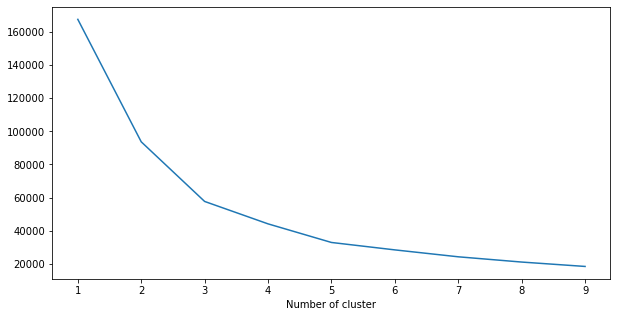

In [258]:
from sklearn.cluster import KMeans
sse={}
rankingcluster = df.iloc[:,[9,10,11]]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(rankingcluster)
    rankingcluster["clusters"] = kmeans.labels_
    
    sse[k] = kmeans.inertia_
print(sse)
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [259]:
kmeans = KMeans(n_clusters=5,random_state=101)
kmeans.fit(rankingcluster)
rankingcluster['Ranking'] = kmeans.predict(rankingcluster)
rankingcluster

<ipython-input-259-674f8b32c2a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rankingcluster['Ranking'] = kmeans.predict(rankingcluster)


,SuddenDcc,SuddenAcc,actualspeedevents,clusters,Ranking
0,4,1,8,8,2
1,3,1,19,0,1
2,1,2,23,0,1
3,1,0,6,3,2
4,3,3,19,0,1
...,...,...,...,...,...
723,3,0,7,8,2
724,1,0,4,3,2
725,10,8,11,6,0
726,1,0,18,0,1


In [260]:
rankingcluster.Ranking.unique()
#from sklearn.cluster import DBSCAN

array([2, 1, 4, 0, 3])

In [261]:
rankingcluster.Ranking = rankingcluster.Ranking.replace((0,1,2,3,4),('Risky','tending towards risk','intermediate risk','tending towards safety','Safe'))
rankingcluster.Ranking

C:\anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0         intermediate risk
1      tending towards risk
2      tending towards risk
3         intermediate risk
4      tending towards risk
               ...         
723       intermediate risk
724       intermediate risk
725                   Risky
726    tending towards risk
727       intermediate risk
Name: Ranking, Length: 728, dtype: object

In [263]:
v=Counter(rankingcluster.Ranking)
v

Counter({'intermediate risk': 414,
         'tending towards risk': 169,
         'Safe': 60,
         'Risky': 73,
         'tending towards safety': 12})

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ranking', ylabel='count'>

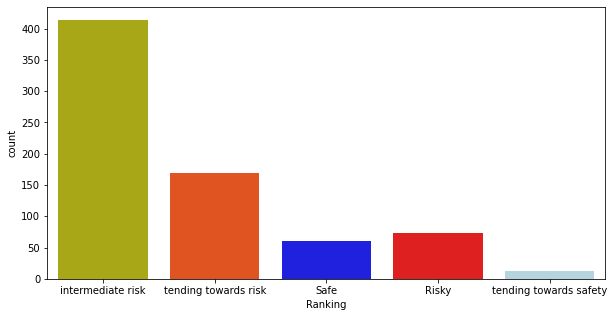

In [272]:
plt.figure(figsize=[10,5])
sns.countplot(rankingcluster.Ranking,orient='h',palette=['y','#FF4500',"b","r", "#ADD8E6"])

In [273]:
rankingcluster.head()

,SuddenDcc,SuddenAcc,actualspeedevents,clusters,Ranking
0,4,1,8,8,intermediate risk
1,3,1,19,0,tending towards risk
2,1,2,23,0,tending towards risk
3,1,0,6,3,intermediate risk
4,3,3,19,0,tending towards risk


## For outlier and noise handling we are using DBSCAN

In [274]:
from sklearn.cluster import DBSCAN

In [320]:
# you can always use hyperparamter tuning to get the best results
dbscan =DBSCAN(eps=4,min_samples=10)
model = dbscan.fit(df[['SuddenAcc','SuddenDcc','speedoverlimit']])

In [321]:
labels= model.labels_
from collections import Counter
print(Counter(labels))

Counter({0: 451, -1: 213, 1: 47, 2: 10, 3: 7})


In [322]:
n_clusters= len(set(labels))-(1 if -1 in labels else 0)
n_clusters

4

In [323]:
# similary you can rank the clusters ignoring the (-1) as it is considered as an outlier in DBSCAN

## Metrics which can be devised for measuring driving behaviour

      Manaully doing calculation of the appropriate features and defining different thersholds for different ranks/scores.
 -->>> But the drawback is even if you are calculating single or multiple coulumns, defining thershold is a hectic task <<<--